In [3]:
import numpy as np
import pandas as pd  # importa a biblioteca pandas muito usada para mexer com arquivos xlsx
import matplotlib.pyplot as plt
from pandas import DataFrame #Importa da biblioteca pandas a opção data frame 
import math
ds = pd.read_excel(r"Dados.xlsx")  # le os dados para fazer a previsão

In [4]:
dados = DataFrame(ds) #converte os dados para DataFrame 
bd= np.asarray(dados) #converte os dados para Matrix

In [5]:
segunda = []  
terca = []                 
quarta = []
quinta = [] 
sexta = []
sabado = []
domingo = []
feriado = []
for i in range(0, len(bd)):  # percorre a matrix
    if bd[i][1] == 1:
        domingo.append(bd[i][4])
    elif bd[i][1] == 2:
        segunda.append(bd[i][4])
    elif bd[i][1] == 3:
        terca.append(bd[i][4])
    elif bd[i][1] == 4:
        quarta.append(bd[i][4])
    elif bd[i][1] == 5:
        quinta.append(bd[i][4])
    elif bd[i][1] == 6:
        sexta.append(bd[i][4])
    elif bd[i][1] == 7:
        sabado.append(bd[i][4])
    else:
        feriado.append(bd[i][4])


In [6]:
print(len(segunda))
print(len(terca))
print(len(quarta))
print(len(quinta))
print(len(sexta))
print(len(sabado))
print(len(domingo))
print(len(feriado))

2400
2424
2448
2472
2376
2424
2472
528


In [7]:
#Salva + ou - o valor de 80% do vetor dos dias da semana, Para comparar entre os dias da semana 
domingo = np.array(domingo[0:1920])
segunda = np.array(segunda[0:1920])
terca = np.array(terca[0:1920])
quarta = np.array(quarta[0:1920])
quinta = np.array(quinta[0:1920])
sexta = np.array(sexta[0:1920])
sabado = np.array(sabado[0:1920])

matriz = np.array([domingo, segunda, terca, quarta, quinta, sexta, sabado], dtype=float)

In [8]:
def dist_euclidiana_np(p, q):
    v1 = np.array(p)
    v2 = np.array(q)
    diff = v1 - v2
    quad_dist = np.dot(diff, diff)
    return math.sqrt(quad_dist)

distancia= np.ones((7,7))
for i in range(0, 7):  # percorre a matrix
    for j in range(0, 7):  # percorre a matrix
          distancia[i][j]=dist_euclidiana_np(matriz[i],matriz[j])/math.sqrt(1920)


In [9]:
# Salva o vetores do tamanho do dia do feriado 
domingof = np.array(domingo[0:528])
segundaf = np.array(segunda[0:528])
tercaf = np.array(terca[0:528])
quartaf = np.array(quarta[0:528])
quintaf = np.array(quinta[0:528])
sextaf = np.array(sexta[0:528])
sabadof = np.array(sabado[0:528])
feriado = np.array(feriado[0:528])

matrizf = np.array([feriado, domingof, segundaf, tercaf, quartaf, quintaf, sextaf, sabadof], dtype=float)

domingof1 = np.array(domingo[528:1056])
segundaf1 = np.array(segunda[528:1056])
tercaf1 = np.array(terca[528:1056])
quartaf1 = np.array(quarta[528:1056])
quintaf1 = np.array(quinta[528:1056])
sextaf1 = np.array(sexta[528:1056])
sabadof1 = np.array(sabado[528:1056])

matrizf1 = np.array([feriado, domingof1, segundaf1, tercaf1, quartaf1, quintaf1, sextaf1, sabadof1], dtype=float)

domingof2 = np.array(domingo[1056:1584])
segundaf2 = np.array(segunda[1056:1584])
tercaf2 = np.array(terca[1056:1584])
quartaf2 = np.array(quarta[1056:1584])
quintaf2 = np.array(quinta[1056:1584])
sextaf2 = np.array(sexta[1056:1584])
sabadof2 = np.array(sabado[1056:1584])

matrizf2 = np.array([feriado, domingof2, segundaf2, tercaf2, quartaf2, quintaf2, sextaf2, sabadof2], dtype=float)

distanciaf= np.ones((1,8))
distanciaf1= np.ones((1,8))
distanciaf2= np.ones((1,8))
distanciaf3= np.ones((1,8))
for i in range(1):  # percorre a matrix
    for j in range(0, 8):  # percorre a matrix
            distanciaf[i][j]=dist_euclidiana_np(matrizf[i],matrizf[j])/math.sqrt(528)
            distanciaf1[i][j]=dist_euclidiana_np(matrizf1[i],matrizf1[j])/math.sqrt(528)
            distanciaf2[i][j]=dist_euclidiana_np(matrizf2[i],matrizf2[j])/math.sqrt(528)

distanciafsoma= distanciaf+distanciaf1+distanciaf2;
distanciaf= distanciafsoma/3

In [10]:
distancia=DataFrame(distancia)
distanciaf=DataFrame(distanciaf)
distancia.to_excel('Distancia-Euclidiana-Semana.xlsx', sheet_name='Sheet1')
distanciaf.to_excel('Distancia-Euclidiana-Semana-com-Feriado.xlsx', sheet_name='Sheet1')

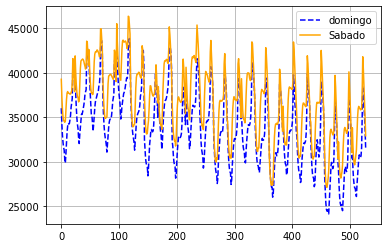

In [11]:
plt.plot(domingo[0:528], 'k--', color='blue', label='domingo')
plt.plot(sabado[0:528], color='orange', label='Sabado')
plt.grid(True)
plt.legend()
plt.rcParams["figure.figsize"] = (15, 6)

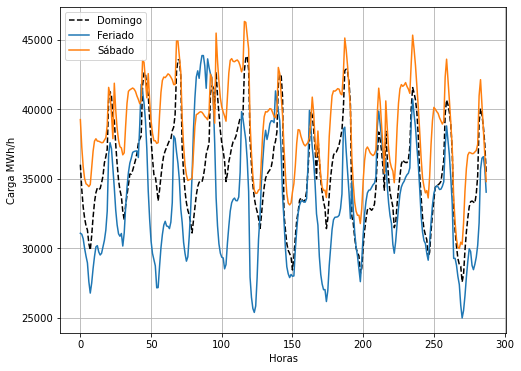

In [39]:
plt.plot(domingo[0:288], 'k--', label='Domingo')
plt.plot(feriado[0:288] , label='Feriado')
plt.plot(sabado[0:288], label='Sábado')
plt.grid(True)
plt.legend()
plt.xlabel('Horas')
plt.ylabel('Carga MWh/h')
plt.rcParams["figure.figsize"] = (8, 6)
plt.savefig("Dias Fds.svg", format="svg",transparent=True)
plt.show()

In [13]:
from matplotlib import interactive
interactive(True)

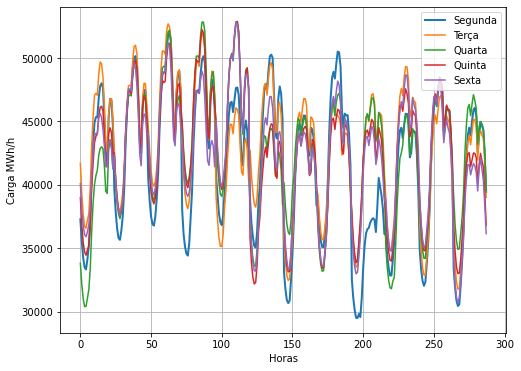

In [14]:
ax1= plt.plot(segunda[0:288],linewidth='2', label='Segunda')
ax2= plt.plot(terca[0:288], label='Terça')
ax3= plt.plot(quarta[0:288], label='Quarta')
ax4= plt.plot(quinta[0:288], label='Quinta')
ax5=plt.plot(sexta[0:288], label='Sexta')
plt.grid(True)
plt.legend()
plt.xlabel('Horas')
plt.ylabel('Carga MWh/h')
plt.rcParams["figure.figsize"] = (8, 6)

plt.savefig("Dias Semana.svg", format="svg",transparent=True)
plt.show()

In [15]:
np.max(bd[:,4])

52889.435

In [16]:
np.std(bd[:,4])

5832.558410650531

In [17]:
np.mean(bd[:,4])

36726.34087234946

In [18]:
janeiro19=dados[('01/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '02/01/2019 00:00')]
fevereiro19=dados[('02/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '03/01/2019 00:00')]
marco19=dados[('03/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '04/01/2019 00:00')]
abril19=dados[('04/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '05/01/2019 00:00')]
maio19=dados[('05/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '06/01/2019 00:00')]
junho19=dados[('06/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '07/01/2019 00:00')]
julho19=dados[('07/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '08/01/2019 00:00')]
agosto19=dados[('08/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '09/01/2019 00:00')]
setembro19=dados[('09/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '10/01/2019 00:00')]
outubro19= dados[('10/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '11/01/2019 00:00')]
novembro19=dados[('11/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '12/01/2019 00:00')]
dezembro19=dados[('12/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '01/01/2020 00:00')]

janeiro20=dados[('01/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '02/01/2020 00:00')]
fevereiro20=dados[('02/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '03/01/2020 00:00')]
marco20=dados[('03/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '04/01/2020 00:00')]
abril20=dados[('04/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '05/01/2020 00:00')]
maio20=dados[('05/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '06/01/2020 00:00')]
junho20=dados[('06/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '07/01/2020 00:00')]
julho20=dados[('07/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '08/01/2020 00:00')]
agosto20=dados[('08/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '09/01/2020 00:00')]
setembro20=dados[('09/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '10/01/2020 00:00')]
outubro20= dados[('10/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '11/01/2020 00:00')]
novembro20=dados[('11/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '12/01/2020 00:00')]
dezembro20=dados[('12/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '01/01/2021 00:00')]

# janeirov=np.array(janeiro['Carga'].tolist()+janeiro1['Carga'].tolist())
# fevereirov=np.array(fevereiro['Carga'].tolist()+fevereiro1['Carga'].tolist())
# marcov=np.array(marco['Carga'].tolist()+marco1['Carga'].tolist())
# abrilv=np.array(abril['Carga'].tolist()+abril1['Carga'].tolist())
# maiov=np.array(maio['Carga'].tolist()+maio1['Carga'].tolist())
# junhov=np.array(junho['Carga'].tolist()+junho1['Carga'].tolist())
# julhov=np.array(julho['Carga'].tolist()+julho1['Carga'].tolist())
# agostov=np.array(agosto['Carga'].tolist()+agosto1['Carga'].tolist())
# setembrov=np.array(setembro['Carga'].tolist()+setembro1['Carga'].tolist())
# outubrov=np.array(outubro['Carga'].tolist()+outubro1['Carga'].tolist())
# novembrov=np.array(novembro['Carga'].tolist()+novembro1['Carga'].tolist())
# dezembrov=np.array(dezembro['Carga'].tolist()+dezembro1['Carga'].tolist())

# janeirov = np.array(janeirov[0:1368])
# fevereirov = np.array(fevereirov[0:1368])
# marcov = np.array(marcov[0:1368])
# abrilv = np.array(abrilv[0:1368])
# maiov = np.array(maiov[0:1368])
# junhov = np.array(junhov[0:1368])
# julhov = np.array(julhov[0:1368])
# agostov = np.array(agostov[0:1368])
# setembrov = np.array(setembrov[0:1368])
# outubrov = np.array(outubrov[0:1368])
# novembrov = np.array(novembrov[0:1368])
# dezembrov = np.array(dezembrov[0:1368])

# ano_matriz = np.array([janeirov, fevereirov, marcov, abrilv, maiov, junhov, julhov, agostov, setembrov, outubrov, novembrov, dezembrov], dtype=float)

In [19]:
janeiro19 = janeiro19[120:696]
janeiro19 = np.array(janeiro19['Carga'])
fevereiro19 = fevereiro19[48:624]
fevereiro19 = np.array(fevereiro19['Carga'])
marco19 = marco19[48:624]
marco19 = np.array(marco19['Carga'])
abril19 = abril19[144:720]
abril19 = np.array(abril19['Carga'])
maio19 = maio19[96:672]
maio19 = np.array(maio19['Carga'])
junho19 =junho19[24:600]
junho19 = np.array(junho19['Carga'])
julho19 =julho19[144:720]
julho19 = np.array(julho19['Carga'])
agosto19 = agosto19[72:648]
agosto19 = np.array(agosto19['Carga'])
setembro19 = setembro19[0:576]
setembro19 = np.array(setembro19['Carga'])
outubro19 = outubro19[120:696]
outubro19 = np.array(outubro19['Carga'])
novembro19 = novembro19[48:624]
novembro19 = np.array(novembro19['Carga'])
dezembro19 = dezembro19[0:576]
dezembro19 = np.array(dezembro19['Carga'])


janeiro20 = janeiro20[96:672]
janeiro20 = np.array(janeiro20['Carga'])
fevereiro20 = fevereiro20[24:600]
fevereiro20 = np.array(fevereiro20['Carga'])
marco20 = marco20[0:576]
marco20 = np.array(marco20['Carga'])
abril20 = abril20[96:672]
abril20 = np.array(abril20['Carga'])
maio20 = maio20[48:624]
maio20 = np.array(maio20['Carga'])
junho20 = junho20[144:720]
junho20 = np.array(junho20['Carga'])
julho20 = julho20[96:672]
julho20 = np.array(julho20['Carga'])
agosto20 = agosto20[24:600]
agosto20 = np.array(agosto20['Carga'])
setembro20 = setembro20[120:696]
setembro20 = np.array(setembro20['Carga'])
outubro20 = outubro20[72:648]
outubro20 = np.array(outubro20['Carga'])
novembro20 = novembro20[0:576]
novembro20 = np.array(novembro20['Carga'])
dezembro20 = dezembro20[120:696]
dezembro20 = np.array(dezembro20['Carga'])


ano_matriz = np.array([janeiro19, fevereiro19, marco19, abril19, maio19, junho19, julho19, agosto19, setembro19, outubro19, novembro19, dezembro19, janeiro20, fevereiro20, marco20, abril20, maio20, junho20, julho20, agosto20, setembro20, outubro20, novembro20, dezembro20])

In [20]:
ano_matriz.shape

(24, 576)

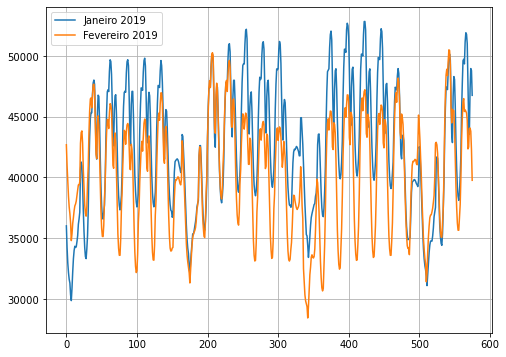

In [41]:
plt.plot(janeiro19, label='Janeiro 2019')
# plt.plot(janeiro20, label='Janeiro 2020')
plt.plot(fevereiro19, label='Fevereiro 2019')
# plt.plot(fevereiro20, label='Fevereiro 2020')
plt.grid(True)
plt.legend()

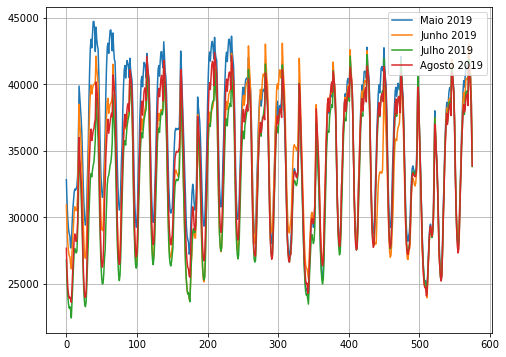

In [22]:
# plt.plot(janeiro19, label='Janeiro 2019')
# plt.plot(fevereiro19, label='Fevereiro 2019')
# plt.plot(marco19, label='Março 2019')
# plt.plot(abril19, label='Abril 2019')
plt.plot(maio19, label='Maio 2019')
plt.plot(junho19, label='Junho 2019')
plt.plot(julho19, label='Julho 2019')
plt.plot(agosto19, label='Agosto 2019')
plt.grid(True)
plt.legend()

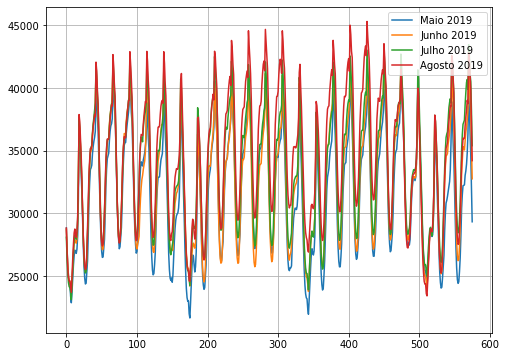

In [23]:
plt.plot(maio20, label='Maio 2019')
plt.plot(junho20, label='Junho 2019')
plt.plot(julho20, label='Julho 2019')
plt.plot(agosto20, label='Agosto 2019')
plt.grid(True)
plt.legend()

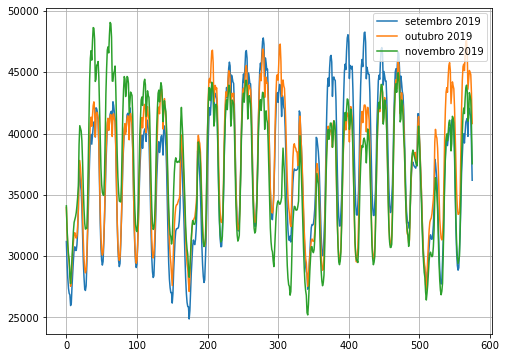

In [24]:
plt.plot(setembro19, label='setembro 2019')
plt.plot(outubro19, label='outubro 2019')
plt.plot(novembro19, label='novembro 2019')
plt.grid(True)
plt.legend()

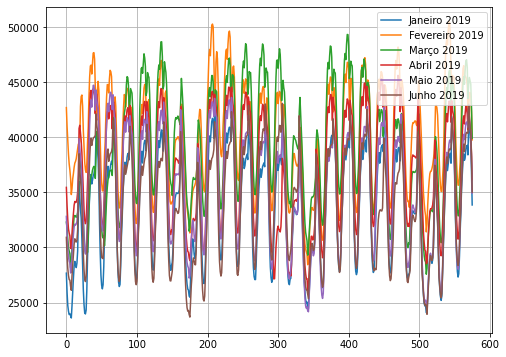

In [25]:
plt.plot(agosto19, label='Janeiro 2019')
plt.plot(fevereiro19, label='Fevereiro 2019')
plt.plot(marco19, label='Março 2019')
plt.plot(abril19, label='Abril 2019')
plt.plot(maio19, label='Maio 2019')
plt.plot(junho19, label='Junho 2019')
plt.grid(True)
plt.legend()

In [26]:
distancia_ano= np.ones((24,24))
for i in range(0, 24):  # percorre a matrix
    for j in range(0, 24):  # percorre a matrix
          distancia_ano[i][j]=dist_euclidiana_np( ano_matriz[i], ano_matriz[j])/math.sqrt(576)

In [27]:
distancia_ano=DataFrame(distancia_ano)
distancia_ano.to_excel('Distancia-Euclidiana-Meses.xlsx', sheet_name='Sheet1')

In [28]:
verao2019 = dados[('01/01/2019 00:00' <= dados['Data']) & (dados['Data'] < '03/20/2019 00:00')]
verao19 = dados[('12/22/2019 00:00' <= dados['Data']) & (dados['Data'] < '01/01/2020 00:00')]
outono2019 = dados[('03/20/2019 00:00' <= dados['Data']) & (dados['Data'] < '06/21/2019 00:00')]
inverno2019 = dados[('06/21/2019 00:00' <= dados['Data']) & (dados['Data'] < '09/23/2019 00:00')]
primavera2019 = dados[('09/23/2019 00:00' <= dados['Data']) & (dados['Data'] < '12/22/2019 00:00')]

verao2020 = dados[('01/01/2020 00:00' <= dados['Data']) & (dados['Data'] < '03/20/2020 00:00')]
outono2020 = dados[('03/20/2020 00:00' <= dados['Data']) & (dados['Data'] < '06/21/2020 00:00')]
inverno2020 = dados[('06/21/2020 00:00' <= dados['Data']) & (dados['Data'] < '09/23/2020 00:00')]
primavera2020 = dados[('09/23/2020 00:00' <= dados['Data']) & (dados['Data'] < '12/22/2020 00:00')]
verao20 = dados[('12/22/2020 00:00' <= dados['Data']) & (dados['Data'] < '12/31/2020 00:00')]

verao2019 = DataFrame(np.array(verao2019).tolist() + np.array(verao19).tolist())
verao2020 = DataFrame(np.array(verao2020).tolist() + np.array(verao20).tolist())

verao2019 = verao2019[120:2112]
verao2019 = np.array(verao2019[4])
outono2019 = outono2019[96:2088]
outono2019= np.array(outono2019['Carga'])
inverno2019 = inverno2019[48:2040]
inverno2019 = np.array(inverno2019['Carga'])
primavera2019 = primavera2019[144:2136]
primavera2019 = np.array(primavera2019['Carga'])
verao2020 = verao2020[96:2088]
verao2020 = np.array(verao2020[4])
outono2020 = outono2020[48:2040]
outono2020 = np.array(outono2020['Carga'])
inverno2020 = inverno2020[0:1992]
inverno2020 = np.array(inverno2020['Carga'])
primavera2020 = primavera2020[96:2088]
primavera2020 = np.array(primavera2020['Carga'])


est_matriz= np.array([verao2019, outono2019, inverno2019, primavera2019, verao2020, outono2020, inverno2020, primavera2020])


In [29]:
distancia_est= np.ones((8,8))
for i in range(0, 8):  # percorre a matrix
    for j in range(0, 8):  # percorre a matrix
          distancia_est[i][j]=dist_euclidiana_np(est_matriz[i], est_matriz[j])/math.sqrt(1992)

In [30]:
distancia_est=DataFrame(distancia_est)
distancia_est.to_excel('Distancia-Euclidiana-Estações.xlsx', sheet_name='Sheet1')

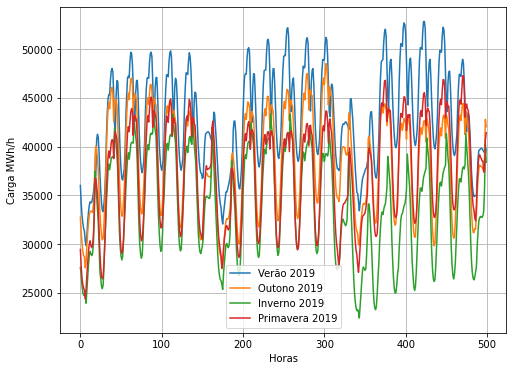

In [46]:
plt.plot(verao2019[0:500], label='Verão 2019')
plt.plot(outono2019[0:500], label='Outono 2019')
plt.plot(inverno2019[0:500], label='Inverno 2019')
plt.plot(primavera2019[0:500], label='Primavera 2019')
plt.grid(True)
plt.xlabel('Horas')
plt.ylabel('Carga MWh/h')
plt.legend()
plt.savefig("Est_2019.svg", format="svg",transparent=True)


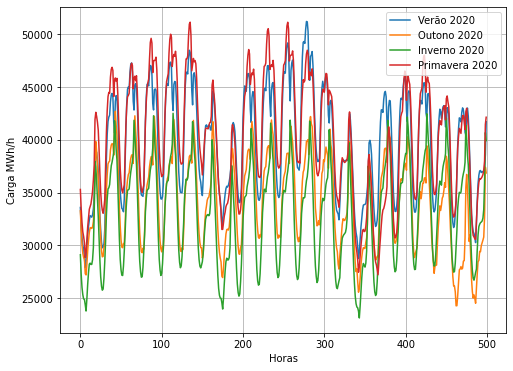

In [47]:
plt.plot(verao2020[0:500], label='Verão 2020')
plt.plot(outono2020[0:500], label='Outono 2020')
plt.plot(inverno2020[0:500], label='Inverno 2020')
plt.plot(primavera2020[0:500], label='Primavera 2020')
plt.grid(True)
plt.xlabel('Horas')
plt.ylabel('Carga MWh/h')
plt.legend()
plt.savefig("Est_2020.svg", format="svg",transparent=True)


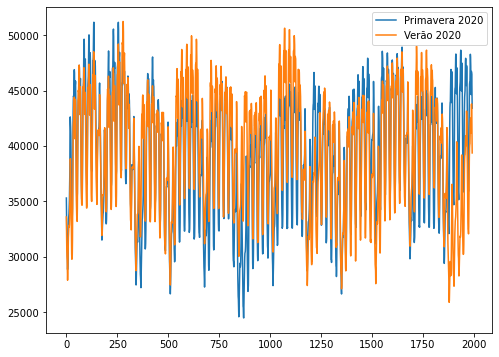

In [51]:
plt.plot(primavera2020, label='Primavera 2020')
plt.plot(verao2020, label='Verão 2020')
plt.legend()